In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [19]:
df = pd.read_csv('../Anmol/Chawla Tyres/train1new.csv')

In [20]:
df.head()

,ProductID,September2016In,September2016Out,September2016Close,October2016In,October2016Out,October2016Close,November2016In,November2016Out,November2016Close,...,Feb2017Close,March2017In,March2017Out,March2017Close,April2017In,April2017Out,April2017Close,May2017In,May2017Out,May2017Close
0,145/80/12XM2 MICHELIN TL,8.0,6.0,12.0,6.0,6.0,12.0,2.0,4.0,10.0,...,17.0,10.0,7.0,20.0,30.0,25.0,25.0,10.0,7.0,28.0
1,145/80/13XM2 MICHELIN TL,9.0,4.0,10.0,NaN,NaN,10.0,5.0,5.0,10.0,...,11.0,8.0,5.0,14.0,4.0,4.0,14.0,NaN,NaN,14.0
2,155/65/13XM2 MICHELIN TL,NaN,4.0,4.0,8.0,NaN,12.0,2.0,4.0,10.0,...,10.0,4.0,4.0,10.0,8.0,6.0,12.0,16.0,8.0,20.0
3,155/65/14XM2 MICHELIN TL,NaN,NaN,8.0,8.0,12.0,4.0,4.0,NaN,8.0,...,10.0,NaN,7.0,3.0,NaN,NaN,3.0,NaN,NaN,3.0
4,155/70/13XM2 MICHELIN TL,11.0,11.0,15.0,14.0,16.0,13.0,28.0,26.0,15.0,...,11.0,23.0,9.0,25.0,8.0,1.0,32.0,10.0,5.0,37.0


In [21]:
typedf = df.dtypes.reset_index()
typedf.columns = ['column','type']
typedf

,column,type
0,ProductID,object
1,September2016In,float64
2,September2016Out,float64
3,September2016Close,float64
4,October2016In,float64
5,October2016Out,float64
6,October2016Close,float64
7,November2016In,float64
8,November2016Out,float64
9,November2016Close,float64


In [26]:
df.replace('NaN',0,inplace=True)

In [119]:
monthlydemand = ['September2016Out','October2016Out','November2016Out','Dec2016Out','Jan2017Out','Feb2017Out','March2017Out','April2017Out','May2017Out']
monthlypurchase = ['September2016In','October2016In','November2016In','Dec2016IN','Jan2017In','Feb2017In','March2017In','April2017In','May2017In']
monthlystock = ['September2016Close','October2016Close','November2016Close','Dec2016Close','Jan2017Close','Feb2017Close','March2017Close','April2017Close','May2017Close']
prodmnthlydemand = dict()
prodmnthlypurchase = dict()
prodmnthlystock = dict()
for index,row in df.iterrows():
    for col in monthlydemand:
        tlist = prodmnthlydemand.get(row['ProductID'],[])
        tlist.append(row[col])
        prodmnthlydemand[row['ProductID']] = tlist[:]
    for col in monthlypurchase:
        tlist = prodmnthlypurchase.get(row['ProductID'],[])
        tlist.append(row[col])
        prodmnthlypurchase[row['ProductID']] = tlist[:]
    for col in monthlystock:
        tlist = prodmnthlystock.get(row['ProductID'],[])
        tlist.append(row[col])
        prodmnthlystock[row['ProductID']] = tlist[:]    
    
#print(prodmnthlydemand)   
#print(prodmnthlypurchase)
#print(prodmnthlystock)

In [122]:
#for key,items in prodmnthlystock.items():
    #fig, ax = plt.subplots(figsize=(6,8))
    #ind = range(len(monthlystock))
    #plt.plot(ind,items,color='red')
    #plt.scatter(ind,items,color='blue')
    #ax.set_xticks(ind)
    #ax.set_xticklabels(monthlystock, rotation='vertical')
    #ax.set_ylabel('Stock')
    #ax.set_xlabel('Months')
    #ax.set_yticks(range(0,int(max(items))+2))
    #plt.title(key)
    #plt.show()

In [124]:
#for key,items in prodmnthlydemand.items():
#    fig, ax = plt.subplots(figsize=(4,4))
#    ind = range(len(monthlystock))
#    plt.plot(ind,items,color='red')
#    plt.scatter(ind,items,color='blue')
#    ax.set_xticks(ind)
#    ax.set_xticklabels(monthlystock, rotation='vertical')
#    ax.set_ylabel('Demand')
#    ax.set_xlabel('Months')
#    ax.set_yticks(range(0,int(max(items))+2))
#    plt.title(key)
#    plt.show()

In [77]:
from sklearn.svm import SVR
import math

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.0, 16.0]
For product 245/70/16LATTITUDECROSS MICHELIN TL :
Actual 0.0 
RBF Predicted [1] 
Linear Predicted [1]


c:\users\anmol\appdata\local\programs\python\python35\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
c:\users\anmol\appdata\local\programs\python\python35\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


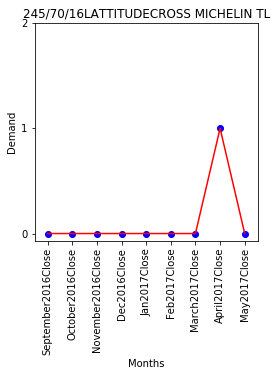

RBF Prediction 1
Linear prediction 1
Stock 3.0



For product 235/55/17LATTITUDE SPORT AO MICHELIN TL :
Actual 0.0 
RBF Predicted [1] 
Linear Predicted [1]


c:\users\anmol\appdata\local\programs\python\python35\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
c:\users\anmol\appdata\local\programs\python\python35\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


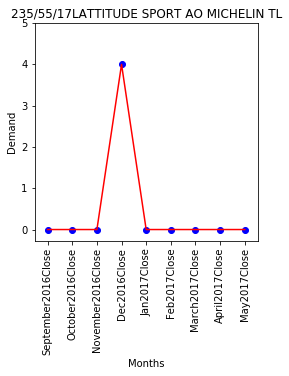

RBF Prediction 1
Linear prediction 1
Stock 4.0



For product 265/70/15LATTCROSS MICHELIN TL :
Actual 0.0 
RBF Predicted [1]

c:\users\anmol\appdata\local\programs\python\python35\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
c:\users\anmol\appdata\local\programs\python\python35\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


 
Linear Predicted [1]


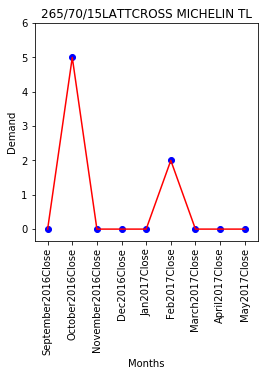

RBF Prediction 1
Linear prediction 1
Stock 4.0





c:\users\anmol\appdata\local\programs\python\python35\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
c:\users\anmol\appdata\local\programs\python\python35\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


For product 225/65/17LATTITUDE MICHELIN TL :
Actual 0.0 
RBF Predicted [1] 
Linear Predicted [1]


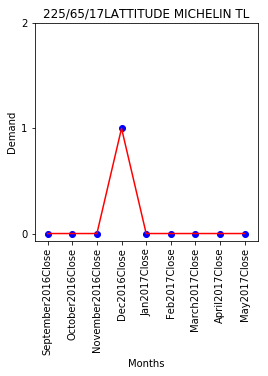

RBF Prediction 1
Linear prediction 1
Stock 4.0



For product 165/80/14XM2 MICHELIN TL :
Actual

c:\users\anmol\appdata\local\programs\python\python35\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
c:\users\anmol\appdata\local\programs\python\python35\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


 27.0 
RBF Predicted [22] 
Linear Predicted [18]


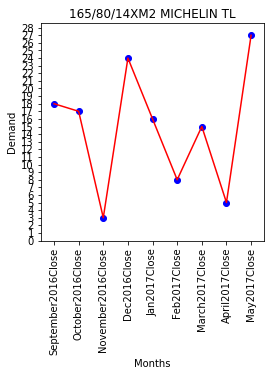

RBF Prediction 14
Linear prediction -1
Stock 33.0



For product 185/65/14XM2 MICHELIN TL :
Actual 4.0 
RBF Predicted [5] 
Linear Predicted [6]


c:\users\anmol\appdata\local\programs\python\python35\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
c:\users\anmol\appdata\local\programs\python\python35\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


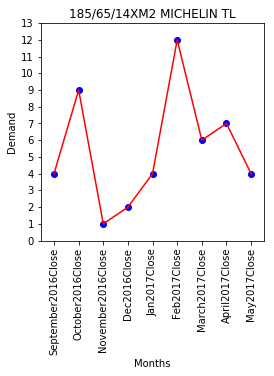

RBF Prediction

c:\users\anmol\appdata\local\programs\python\python35\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
c:\users\anmol\appdata\local\programs\python\python35\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


 10
Linear prediction 5
Stock 23.0



For product 145/80/13XM2 MICHELIN TL :
Actual 0.0 
RBF Predicted [0] 
Linear Predicted [1]


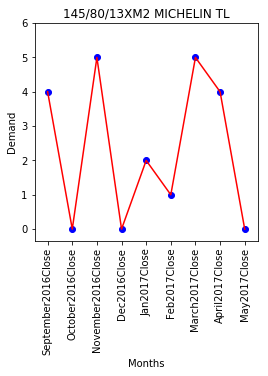

RBF Prediction 5
Linear prediction 3
Stock 14.0



For product 265/65/17LATT CROSS MICHELIN  TL :
Actual 0.0 
RBF Predicted [1] 
Linear Predicted [1]


c:\users\anmol\appdata\local\programs\python\python35\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
c:\users\anmol\appdata\local\programs\python\python35\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


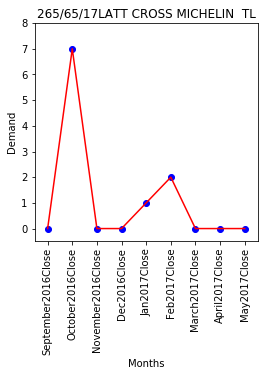

RBF Prediction 1
Linear prediction 1
Stock 2.0



For product 

c:\users\anmol\appdata\local\programs\python\python35\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
c:\users\anmol\appdata\local\programs\python\python35\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


195/70/14XM2 MICHELIN TL :
Actual 0.0 
RBF Predicted [1] 
Linear Predicted [1]


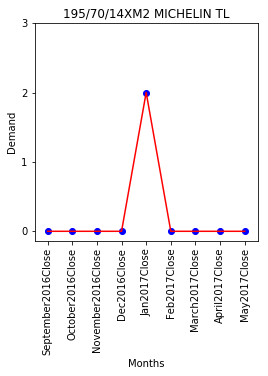

RBF Prediction 1
Linear prediction 1
Stock 4.0



For product 235/70/16BFGOODRICH MICHELIN TL :
Actual 0.0 
RBF Predicted [0] 
Linear Predicted [0]


c:\users\anmol\appdata\local\programs\python\python35\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
c:\users\anmol\appdata\local\programs\python\python35\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


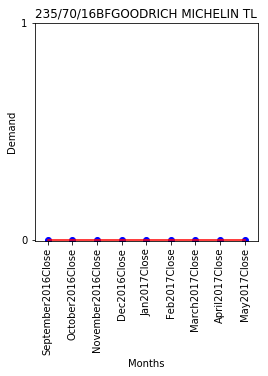

RBF Prediction 0
Linear prediction 0
Stock 2.0



For product 245/45/18PRIMACY3ST MICHELIN TL :
Actual 0.0 
RBF Predicted [1] 
Linear Predicted [1]


c:\users\anmol\appdata\local\programs\python\python35\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
c:\users\anmol\appdata\local\programs\python\python35\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


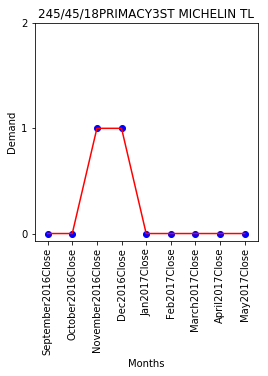

RBF Prediction 1
Linear prediction 1
Stock 4.0



For product 155/65/13XM2 MICHELIN TL 

c:\users\anmol\appdata\local\programs\python\python35\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
c:\users\anmol\appdata\local\programs\python\python35\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


:
Actual 8.0 
RBF Predicted [1] 
Linear Predicted [-1]


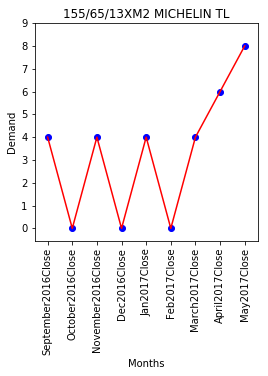

RBF Prediction 2
Linear prediction -3
Stock 20.0



For product 195/60/15XM2 MICHELIN TL :
Actual 0.0 
RBF Predicted [6] 
Linear Predicted [2]


c:\users\anmol\appdata\local\programs\python\python35\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
c:\users\anmol\appdata\local\programs\python\python35\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


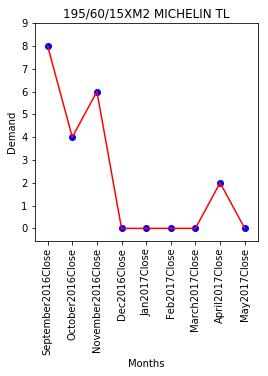

RBF Prediction 1
Linear prediction 1
Stock 5.0



For product 255/45/18PRIMACY HP MO MICHELIN TL :
Actual 0.0 
RBF Predicted [0] 
Linear Predicted [0]


c:\users\anmol\appdata\local\programs\python\python35\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
c:\users\anmol\appdata\local\programs\python\python35\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


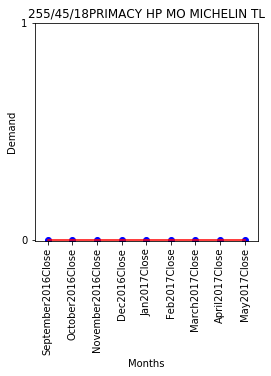

RBF Prediction 0
Linear prediction 0
Stock 2.0



For product 225/55/16PRIMACY LC MICHELIN TL :
Actual 2.0 
RBF Predicted [0] 
Linear Predicted [0]


c:\users\anmol\appdata\local\programs\python\python35\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
c:\users\anmol\appdata\local\programs\python\python35\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


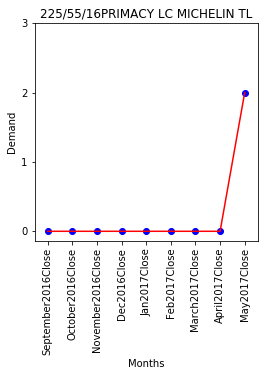

RBF Prediction 0
Linear prediction 0
Stock 2.0



For product 235/65/17PRIMACY SUV MICHELIN TL :
Actual 0.0 
RBF Predicted [0] 
Linear Predicted [0]


c:\users\anmol\appdata\local\programs\python\python35\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
c:\users\anmol\appdata\local\programs\python\python35\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


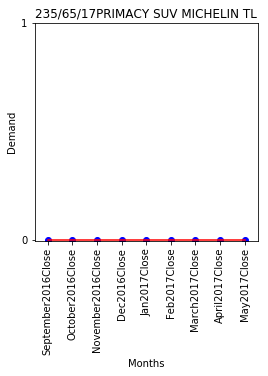

RBF Prediction 0
Linear prediction 0
Stock 5.0



For product 155/65/14XM2 MICHELIN TL :
Actual 0.0 
RBF Predicted [2] 
Linear Predicted [2]


c:\users\anmol\appdata\local\programs\python\python35\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
c:\users\anmol\appdata\local\programs\python\python35\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


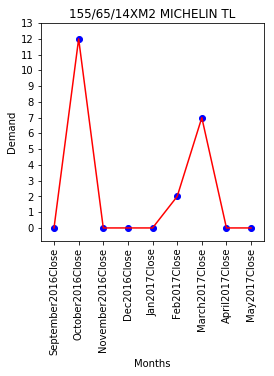

RBF Prediction 2
Linear prediction 

c:\users\anmol\appdata\local\programs\python\python35\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
c:\users\anmol\appdata\local\programs\python\python35\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


2
Stock 3.0



For product 275/45/20LATITUDE SPORT 3 MICHELIN TL :
Actual 0.0 
RBF Predicted [1] 
Linear Predicted [1]


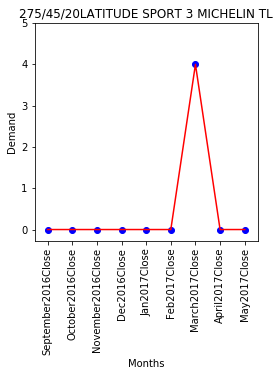

RBF Prediction 1
Linear prediction 1
Stock 2.0



For product 175/70/13XM2 MICHELIN TL :
Actual 0.0 
RBF Predicted [1] 
Linear Predicted [3]


c:\users\anmol\appdata\local\programs\python\python35\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
c:\users\anmol\appdata\local\programs\python\python35\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


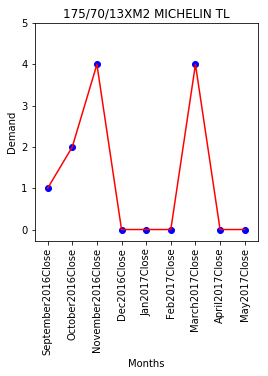

RBF Prediction 1
Linear prediction 3
Stock 6.0



For product 195/55/16XM2 MICHELIN TL :
Actual 0.0 
RBF Predicted [0] 
Linear Predicted [0]


c:\users\anmol\appdata\local\programs\python\python35\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
c:\users\anmol\appdata\local\programs\python\python35\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


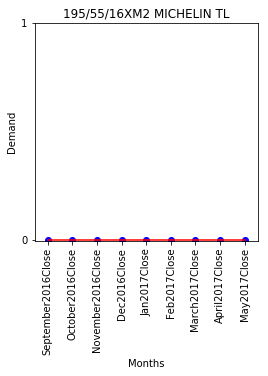

RBF Prediction 0
Linear prediction 0
Stock 4.0



For product 185/60/15XM2 MICHELIN TL :
Actual 1.0 
RBF Predicted [2] 
Linear Predicted [3]


c:\users\anmol\appdata\local\programs\python\python35\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
c:\users\anmol\appdata\local\programs\python\python35\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


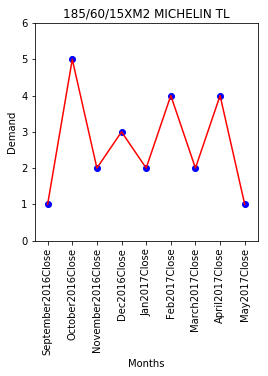

RBF Prediction 6
Linear prediction 5
Stock 15.0



For product 165/70/14XM2 MICHELIN TL :
Actual 4.0 
RBF Predicted [3]

c:\users\anmol\appdata\local\programs\python\python35\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
c:\users\anmol\appdata\local\programs\python\python35\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


 
Linear Predicted [4]


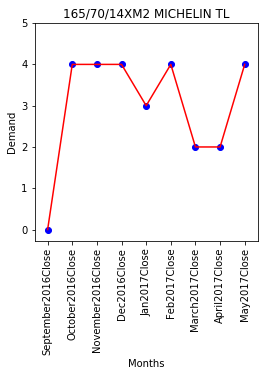

RBF Prediction 4
Linear prediction 4
Stock 18.0



For product 265/65/17LTX FORCE MICHELIN TL :
Actual 4.0 
RBF Predicted [1] 
Linear Predicted [1]


c:\users\anmol\appdata\local\programs\python\python35\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
c:\users\anmol\appdata\local\programs\python\python35\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


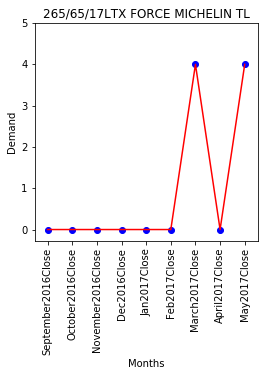

RBF Prediction 1
Linear prediction 1
Stock 14.0



For product

c:\users\anmol\appdata\local\programs\python\python35\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
c:\users\anmol\appdata\local\programs\python\python35\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


 225/50/17PRIMACY3ST MICHELIN TL :
Actual 0.0 
RBF Predicted [1] 
Linear Predicted [1]


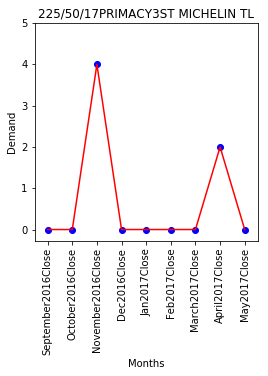

RBF Prediction 1
Linear prediction 1
Stock 5.0



For product 195/60/16PRIMACY3 ST MICHELIN TL :
Actual 0.0 
RBF Predicted [-2] 
Linear Predicted [4]


c:\users\anmol\appdata\local\programs\python\python35\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
c:\users\anmol\appdata\local\programs\python\python35\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


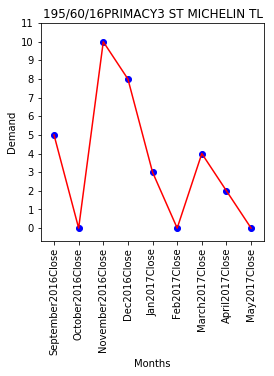

RBF Prediction 5
Linear prediction 4
Stock 7.0



For product 195/65/15PRIMACY3ST MICHELIN TL :
Actual 0.0 
RBF Predicted [0] 
Linear Predicted [0]


c:\users\anmol\appdata\local\programs\python\python35\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
c:\users\anmol\appdata\local\programs\python\python35\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


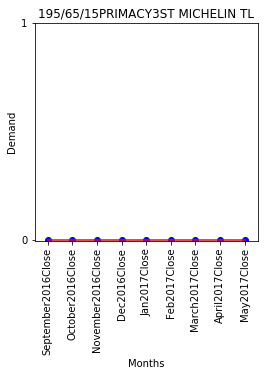

RBF Prediction 0
Linear prediction 0
Stock 5.0



For product 185R14AGLIS MICHELIN TL :
Actual 0.0 
RBF Predicted [1] 
Linear Predicted [1]


c:\users\anmol\appdata\local\programs\python\python35\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
c:\users\anmol\appdata\local\programs\python\python35\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


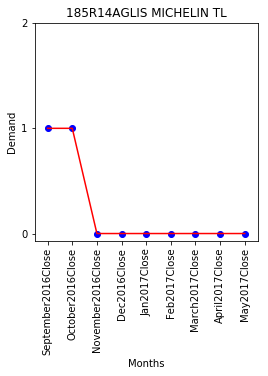

RBF Prediction 1
Linear prediction 1
Stock 6.0



For product 185/60/14PILOT PRECEDA 2 MICHELIN TL :
Actual 0.0 
RBF Predicted [0] 
Linear Predicted [0]


c:\users\anmol\appdata\local\programs\python\python35\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
c:\users\anmol\appdata\local\programs\python\python35\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


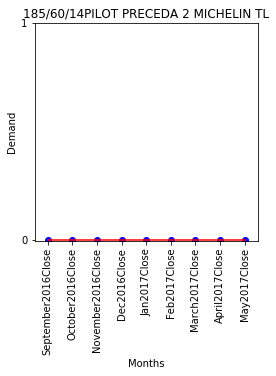

RBF Prediction 0
Linear prediction 0
Stock 2.0



For product 185/60/14XM2 MICHELIN TL :
Actual 0.0 
RBF Predicted [1] 
Linear Predicted [1]


c:\users\anmol\appdata\local\programs\python\python35\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
c:\users\anmol\appdata\local\programs\python\python35\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


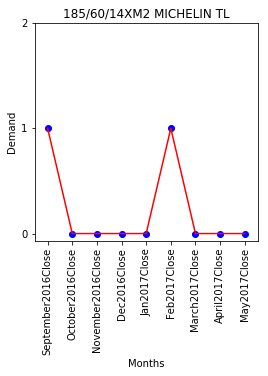

RBF Prediction 1
Linear prediction 1
Stock 4.0



For product 245/45/19PRIMACY 3ST MICHELIN TL :
Actual 0.0 
RBF Predicted [0] 
Linear Predicted [0]


c:\users\anmol\appdata\local\programs\python\python35\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
c:\users\anmol\appdata\local\programs\python\python35\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


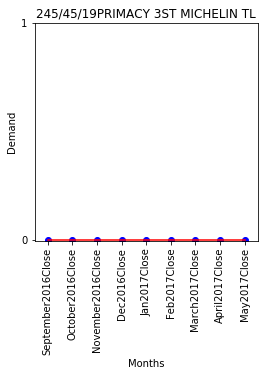

RBF Prediction 0
Linear prediction 0
Stock 2.0



For product 145/80/12XM2 MICHELIN TL :
Actual 7.0 
RBF Predicted [16] 
Linear Predicted [4]


c:\users\anmol\appdata\local\programs\python\python35\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
c:\users\anmol\appdata\local\programs\python\python35\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


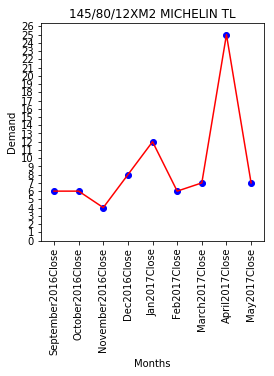

RBF Prediction 18
Linear prediction 7
Stock 28.0



For product 195/60/15PRIMACY3ST MICHELIN TL :
Actual 0.0 
RBF Predicted [2] 
Linear Predicted [2]


c:\users\anmol\appdata\local\programs\python\python35\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
c:\users\anmol\appdata\local\programs\python\python35\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


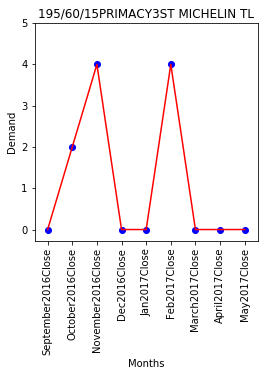

RBF Prediction 2
Linear prediction 2
Stock 5.0



For product 215/65/16LTX FORCE MICHELIN TL :
Actual 16.0 
RBF Predicted [1] 
Linear Predicted [1]


c:\users\anmol\appdata\local\programs\python\python35\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
c:\users\anmol\appdata\local\programs\python\python35\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


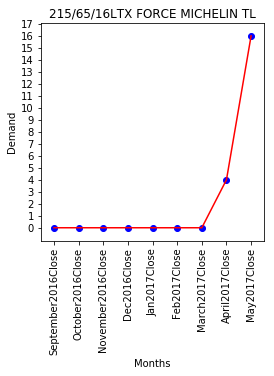

RBF Prediction 1
Linear prediction 1
Stock 11.0



For product 205/55/16PRIMACY3 ST MICHELIN TL :
Actual 0.0 
RBF Predicted [1] 
Linear Predicted [0]


c:\users\anmol\appdata\local\programs\python\python35\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
c:\users\anmol\appdata\local\programs\python\python35\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


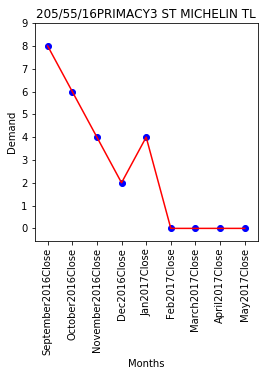

RBF Prediction 1
Linear prediction 0
Stock 10.0



For product 235/65/17LATTITUDE SPORTS 3 MICHELIN TL :
Actual 2.0 
RBF Predicted [1] 
Linear Predicted [1]


c:\users\anmol\appdata\local\programs\python\python35\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
c:\users\anmol\appdata\local\programs\python\python35\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


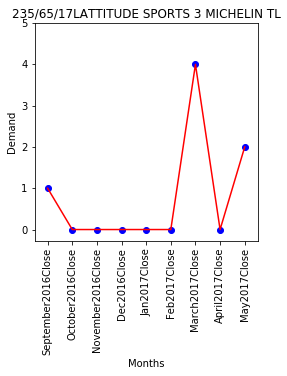

c:\users\anmol\appdata\local\programs\python\python35\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
c:\users\anmol\appdata\local\programs\python\python35\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


RBF Prediction 1
Linear prediction 1
Stock 8.0



For product 215/75/15LATTITUDE CROSS MICHELIN TL :
Actual 0.0 
RBF Predicted [1] 
Linear Predicted [1]


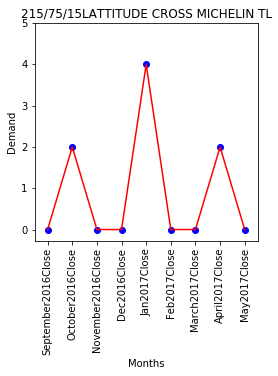

RBF Prediction 2
Linear prediction 2
Stock 5.0



For product 245/45/17PRIMACY3ST MICHELIN TL :
Actual 2.0 
RBF Predicted [1] 
Linear Predicted [1]


c:\users\anmol\appdata\local\programs\python\python35\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
c:\users\anmol\appdata\local\programs\python\python35\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


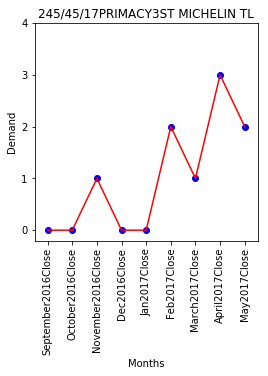

RBF Prediction 1
Linear prediction 1
Stock 3.0



For product 235/70/16LTX FORCE MICHELIN TL :
Actual 0.0 
RBF Predicted [0] 
Linear Predicted [0]


c:\users\anmol\appdata\local\programs\python\python35\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
c:\users\anmol\appdata\local\programs\python\python35\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


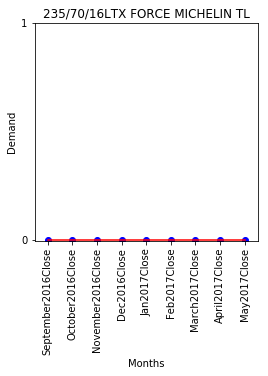

RBF Prediction 0
Linear prediction 0
Stock 4.0



For product 255/55/18LATITUDE SPORTS3 MIHCELIN TL :
Actual 0.0 
RBF Predicted [0] 
Linear Predicted [0]


c:\users\anmol\appdata\local\programs\python\python35\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
c:\users\anmol\appdata\local\programs\python\python35\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


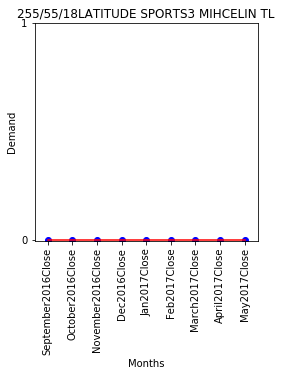

RBF Prediction 0
Linear prediction 0
Stock 4.0



For product 185/65/15XM2 MICHELIN TL :
Actual 11.0 
RBF Predicted [7] 
Linear Predicted [9]


c:\users\anmol\appdata\local\programs\python\python35\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
c:\users\anmol\appdata\local\programs\python\python35\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


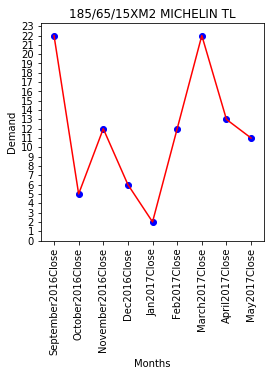

RBF Prediction 5
Linear prediction 9
Stock 40.0



For product 175/65/14XM2 MICHELIN TL :
Actual 10.0 
RBF Predicted [11] 
Linear Predicted [9]


c:\users\anmol\appdata\local\programs\python\python35\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
c:\users\anmol\appdata\local\programs\python\python35\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


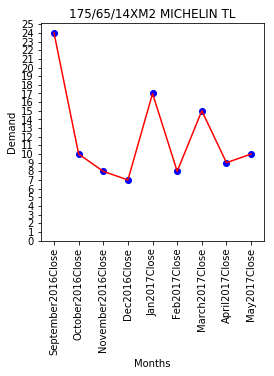

RBF Prediction 9
Linear prediction 9
Stock 22.0



For product 215/65/16PRIMACY SUV MICHELIN TL :
Actual 0.0 
RBF Predicted [5] 
Linear Predicted [4]


c:\users\anmol\appdata\local\programs\python\python35\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
c:\users\anmol\appdata\local\programs\python\python35\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


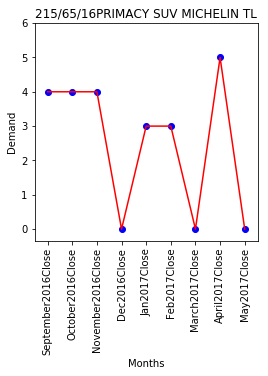

RBF Prediction 4
Linear prediction 4
Stock 5.0



For product 235/60/18LATTITUDE SPORTS 3 MICHELIN TL :
Actual 0.0 
RBF Predicted [1] 
Linear Predicted [1]


c:\users\anmol\appdata\local\programs\python\python35\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
c:\users\anmol\appdata\local\programs\python\python35\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


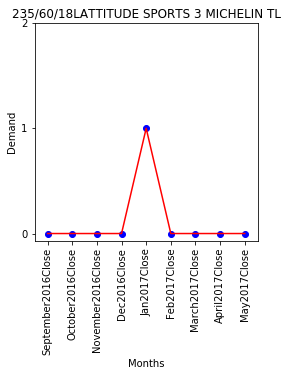

RBF Prediction 1
Linear prediction 1
Stock 4.0



For product 195/65/15XM2 MICHELIN TL :
Actual 0.0 
RBF Predicted [2] 
Linear Predicted [2]


c:\users\anmol\appdata\local\programs\python\python35\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
c:\users\anmol\appdata\local\programs\python\python35\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


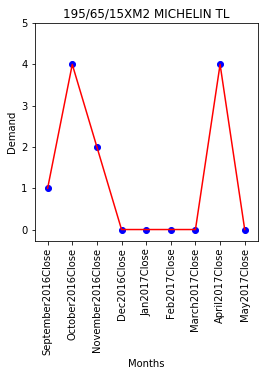

RBF Prediction 1
Linear prediction 1
Stock 9.0



For product 205/60/16PRIMACY3ST MICHELIN TL :
Actual 4.0 
RBF Predicted [-1] 
Linear Predicted [1]


c:\users\anmol\appdata\local\programs\python\python35\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
c:\users\anmol\appdata\local\programs\python\python35\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


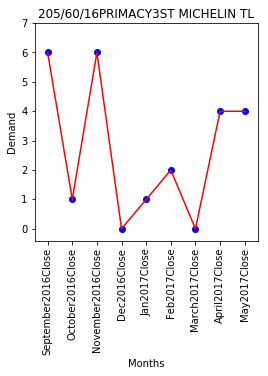

RBF Prediction -1
Linear prediction 1
Stock 10.0



For product 235/70/16LTX2 MICHELIN TL :
Actual 2.0 
RBF Predicted [5] 
Linear Predicted [4]


c:\users\anmol\appdata\local\programs\python\python35\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
c:\users\anmol\appdata\local\programs\python\python35\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


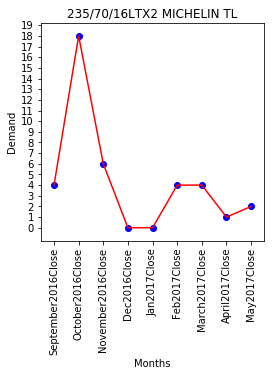

RBF Prediction 6
Linear prediction 4
Stock 7.0



For product 205/65/15AGILIS MICHELIN TL :
Actual 0.0 
RBF Predicted [1] 
Linear Predicted [1]


c:\users\anmol\appdata\local\programs\python\python35\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
c:\users\anmol\appdata\local\programs\python\python35\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


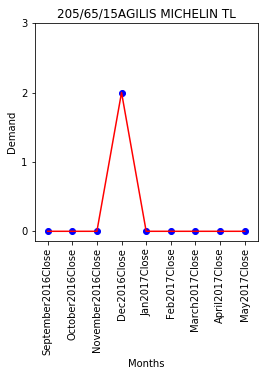

RBF Prediction 1
Linear prediction 1
Stock 4.0



For product 165/65/14XM2 MICHELIN TL :
Actual 0.0 
RBF Predicted [2] 
Linear Predicted [6]


c:\users\anmol\appdata\local\programs\python\python35\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
c:\users\anmol\appdata\local\programs\python\python35\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


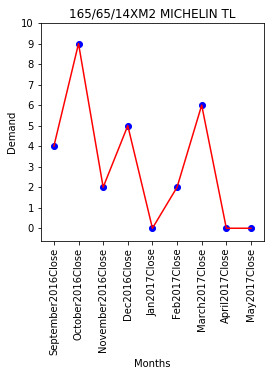

RBF Prediction 2
Linear prediction 6
Stock 17.0



For product 235/65/17LATTITUDE TOUR HP MICHELIN TL :
Actual 

c:\users\anmol\appdata\local\programs\python\python35\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
c:\users\anmol\appdata\local\programs\python\python35\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


8.0 
RBF Predicted [0] 
Linear Predicted [0]


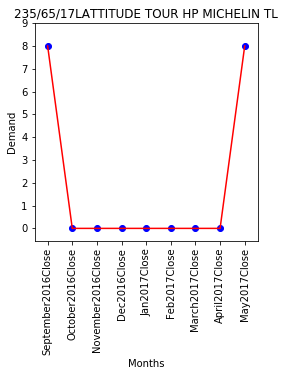

RBF Prediction 0
Linear prediction 0
Stock 1.0



For product 175/65/15XM1 MICHELIN TL :
Actual 0.0 
RBF Predicted [1] 
Linear Predicted [1]


c:\users\anmol\appdata\local\programs\python\python35\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
c:\users\anmol\appdata\local\programs\python\python35\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


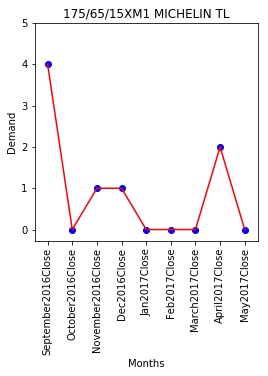

RBF Prediction 1
Linear prediction 1
Stock 0.0



For product 225/45/17PRIMACY3ST MICHELIN TL :
Actual 0.0 
RBF Predicted [0] 
Linear Predicted [0]


c:\users\anmol\appdata\local\programs\python\python35\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
c:\users\anmol\appdata\local\programs\python\python35\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


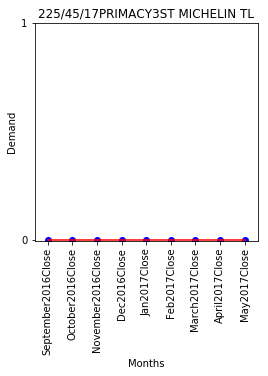

RBF Prediction 0
Linear prediction 0
Stock 0.0



For product 175/70/14XM2 MICHELIN TL :
Actual 9.0 
RBF Predicted [9] 
Linear Predicted [3]


c:\users\anmol\appdata\local\programs\python\python35\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
c:\users\anmol\appdata\local\programs\python\python35\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


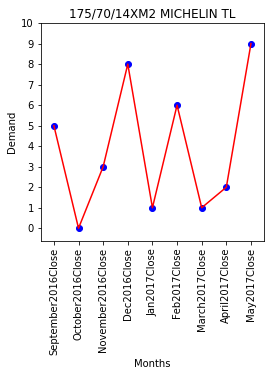

RBF Prediction -2
Linear prediction 1
Stock 20.0



For product 205/65/15XM2 MICHELIN TL :
Actual 19.0 
RBF Predicted [11] 
Linear Predicted [16]


c:\users\anmol\appdata\local\programs\python\python35\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
c:\users\anmol\appdata\local\programs\python\python35\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


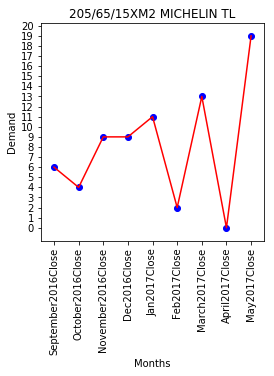

RBF Prediction 7
Linear prediction -7
Stock 21.0



For product 215/55/17PRIMACY3ST MICHELIN TL :
Actual 0.0 
RBF Predicted [0] 
Linear Predicted [0]


c:\users\anmol\appdata\local\programs\python\python35\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
c:\users\anmol\appdata\local\programs\python\python35\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


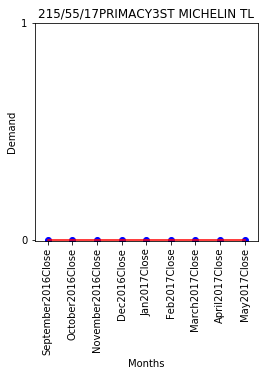

RBF Prediction 0
Linear prediction 0
Stock 8.0



For product 235/75/15LTX MICHELIN TL :
Actual 0.0 
RBF Predicted [1] 
Linear Predicted [1]


c:\users\anmol\appdata\local\programs\python\python35\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
c:\users\anmol\appdata\local\programs\python\python35\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


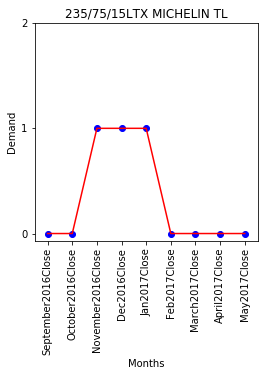

RBF Prediction 1
Linear prediction 1
Stock 4.0



For product 275/50/20LATITUDE SPORT MICHELIN TL :
Actual 0.0 
RBF Predicted [1] 
Linear Predicted [1]


c:\users\anmol\appdata\local\programs\python\python35\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
c:\users\anmol\appdata\local\programs\python\python35\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


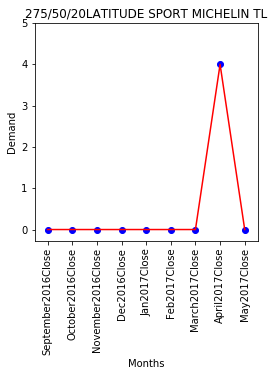

RBF Prediction 1
Linear prediction 1
Stock 0.0



For product 155/80/13XM2 MICHELIN TL :
Actual 7.0 
RBF Predicted [13] 
Linear Predicted [13]


c:\users\anmol\appdata\local\programs\python\python35\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
c:\users\anmol\appdata\local\programs\python\python35\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


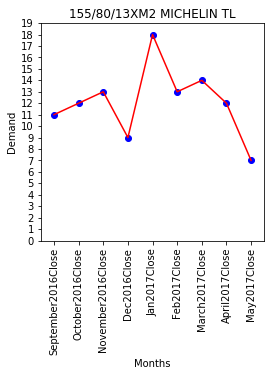

RBF Prediction 23
Linear prediction 13
Stock 17.0



For product 255/50/19LATITUDE SPORT3 MICHELIN TL :
Actual 0.0 
RBF Predicted [0] 
Linear Predicted [0]


c:\users\anmol\appdata\local\programs\python\python35\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
c:\users\anmol\appdata\local\programs\python\python35\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


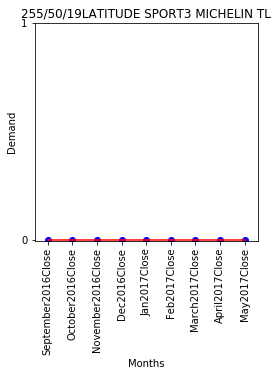

RBF Prediction 0
Linear prediction 0
Stock 4.0



For product 225/55/17PRIMACY 3ST MICHELIN TL :
Actual 0.0 
RBF Predicted [1] 
Linear Predicted [1]


c:\users\anmol\appdata\local\programs\python\python35\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
c:\users\anmol\appdata\local\programs\python\python35\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


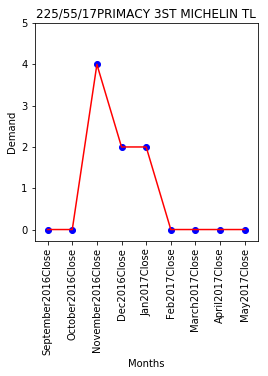

RBF Prediction 1
Linear prediction 1
Stock 5.0



For product 165/65/13XM2 MICHELIN TL :
Actual 0.0 
RBF Predicted [1] 
Linear Predicted [1]


c:\users\anmol\appdata\local\programs\python\python35\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
c:\users\anmol\appdata\local\programs\python\python35\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


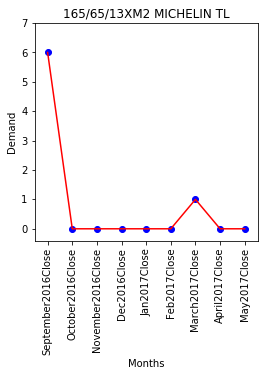

RBF Prediction 1
Linear prediction 1
Stock 4.0



For product 225/45/17PILOT SPORT 3 MICHELIN TL :
Actual 0.0 
RBF Predicted [1] 
Linear Predicted [1]


c:\users\anmol\appdata\local\programs\python\python35\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
c:\users\anmol\appdata\local\programs\python\python35\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


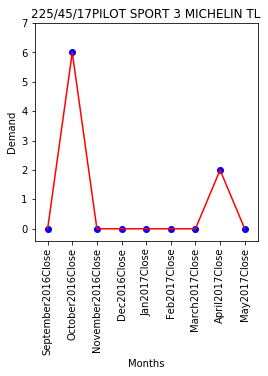

RBF Prediction 1
Linear prediction 1
Stock 6.0



For product 155/70/13XM2 MICHELIN TL :
Actual 5.0 
RBF Predicted [17] 
Linear Predicted [3]


c:\users\anmol\appdata\local\programs\python\python35\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
c:\users\anmol\appdata\local\programs\python\python35\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


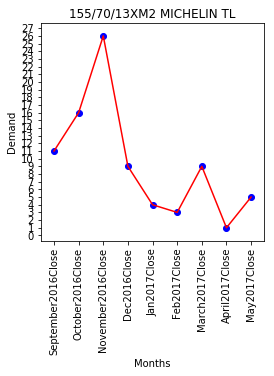

RBF Prediction -1
Linear prediction 4
Stock 37.0



For product 185/70/14XM2 MICHELIN TL :
Actual 6.0 
RBF Predicted [1] 
Linear Predicted [4]


c:\users\anmol\appdata\local\programs\python\python35\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
c:\users\anmol\appdata\local\programs\python\python35\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


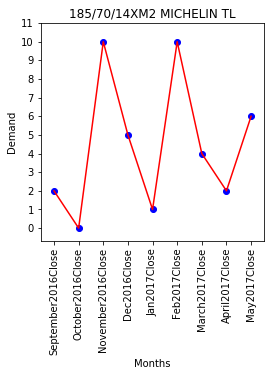

RBF Prediction -9
Linear prediction 4
Stock 19.0



For product 215/55/16PRIMACYLC MICHELIN TL :
Actual 0.0 
RBF Predicted [1] 
Linear Predicted 

c:\users\anmol\appdata\local\programs\python\python35\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
c:\users\anmol\appdata\local\programs\python\python35\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


[1]


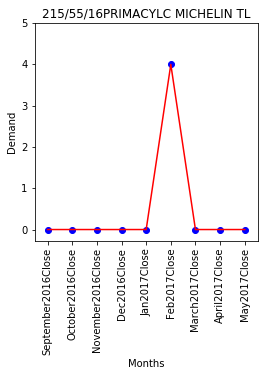

RBF Prediction 1
Linear prediction 1
Stock 0.0



For product 175/65/15XM2 MICHELIN TL :
Actual 9.0 
RBF Predicted [1] 
Linear Predicted [4]


c:\users\anmol\appdata\local\programs\python\python35\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
c:\users\anmol\appdata\local\programs\python\python35\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


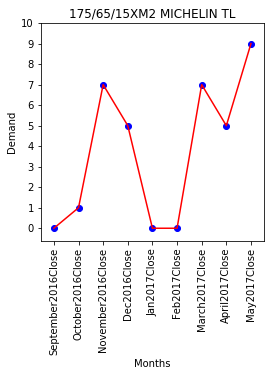

RBF Prediction 8
Linear prediction 6
Stock 25.0



For product 225/50/16PILOT SPORTS3 MICHELIN TL :
Actual 0.0 
RBF Predicted [0] 
Linear Predicted [0]


c:\users\anmol\appdata\local\programs\python\python35\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
c:\users\anmol\appdata\local\programs\python\python35\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


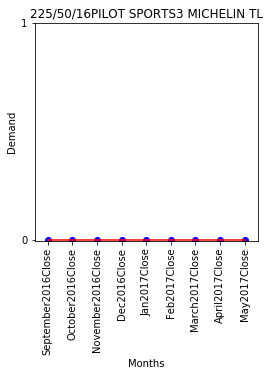

RBF Prediction 0
Linear prediction 0
Stock 4.0



For product 215/60/16PRIMACY3ST MICHELIN TL :
Actual 0.0 
RBF Predicted [1] 
Linear Predicted [1]


c:\users\anmol\appdata\local\programs\python\python35\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
c:\users\anmol\appdata\local\programs\python\python35\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


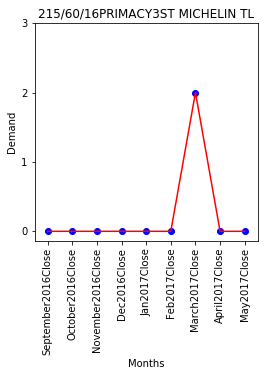

RBF Prediction 1
Linear prediction 1
Stock 4.0





In [133]:
# Predicting Demands for the month of june! I am takin
PredictedDemand = dict()
svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1)
svr_linear = SVR(kernel='linear', C=1e3)
print(prodmnthlydemand['215/65/16LTX FORCE MICHELIN TL'])
for key,value in prodmnthlydemand.items():
    X = [[i] for i in value[:len(value)-1]]
    Y = value[1:]
    rbf_model = svr_rbf.fit(X[:-1],Y[:-1])
    linear_model = svr_linear.fit(X[:-1],Y[:-1])
    y_rbf = [math.ceil(i) for i in rbf_model.predict(X[-1])]
    y_lin = [math.ceil(i) for i in linear_model.predict(X[-1])]
    print('For product',key,':\nActual',Y[-1],'\nRBF Predicted',y_rbf,'\nLinear Predicted',y_lin)
    pred1 = rbf_model.predict(math.ceil(value[-1]))
    pred2 = linear_model.predict(math.ceil(value[-1]))
    PredictedDemand[key] = pred1
    fig, ax = plt.subplots(figsize=(4,4))
    ind = range(len(monthlystock))
    plt.plot(ind,value,color='red')
    plt.scatter(ind, value, color='blue')
    ax.set_xticks(ind)
    ax.set_xticklabels(monthlystock, rotation='vertical')
    ax.set_ylabel('Demand')
    ax.set_xlabel('Months')
    ax.set_yticks(range(0,int(max(value))+2))
    plt.title(key)
    plt.show()
    print("RBF Prediction",math.ceil(pred1))
    print("Linear prediction",math.ceil(pred2))
    print("Stock",prodmnthlystock[key][-1])
    print('\n\n')
#print(y_poly)

In [109]:
demand_df = pd.DataFrame(prodmnthlydemand)
mean_demand_df = demand_df.rolling(window=2,center=False).mean()
standard_demand_df = demand_df.rolling(window=2, center=False).std()
mean_demand_df.replace('NaN',0,inplace=True)
standard_demand_df.replace('NaN',0,inplace=True)
mean_demand_df

,145/80/12XM2 MICHELIN TL,145/80/13XM2 MICHELIN TL,155/65/13XM2 MICHELIN TL,155/65/14XM2 MICHELIN TL,155/70/13XM2 MICHELIN TL,155/80/13XM2 MICHELIN TL,165/65/13XM2 MICHELIN TL,165/65/14XM2 MICHELIN TL,165/70/14XM2 MICHELIN TL,165/80/14XM2 MICHELIN TL,...,245/45/19PRIMACY 3ST MICHELIN TL,245/70/16LATTITUDECROSS MICHELIN TL,255/45/18PRIMACY HP MO MICHELIN TL,255/50/19LATITUDE SPORT3 MICHELIN TL,255/55/18LATITUDE SPORTS3 MIHCELIN TL,265/65/17LATT CROSS MICHELIN TL,265/65/17LTX FORCE MICHELIN TL,265/70/15LATTCROSS MICHELIN TL,275/45/20LATITUDE SPORT 3 MICHELIN TL,275/50/20LATITUDE SPORT MICHELIN TL
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,6.0,2.0,2.0,6.0,13.5,11.5,3.0,6.5,2.0,17.5,...,0.0,0.0,0.0,0.0,0.0,3.5,0.0,2.5,0.0,0.0
2,5.0,2.5,2.0,6.0,21.0,12.5,0.0,5.5,4.0,10.0,...,0.0,0.0,0.0,0.0,0.0,3.5,0.0,2.5,0.0,0.0
3,6.0,2.5,2.0,0.0,17.5,11.0,0.0,3.5,4.0,13.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,10.0,1.0,2.0,0.0,6.5,13.5,0.0,2.5,3.5,20.0,...,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0
5,9.0,1.5,2.0,1.0,3.5,15.5,0.0,1.0,3.5,12.0,...,0.0,0.0,0.0,0.0,0.0,1.5,0.0,1.0,0.0,0.0
6,6.5,3.0,2.0,4.5,6.0,13.5,0.5,4.0,3.0,11.5,...,0.0,0.0,0.0,0.0,0.0,1.0,2.0,1.0,2.0,0.0
7,16.0,4.5,5.0,3.5,5.0,13.0,0.5,3.0,2.0,10.0,...,0.0,0.5,0.0,0.0,0.0,0.0,2.0,0.0,2.0,2.0
8,16.0,2.0,7.0,0.0,3.0,9.5,0.0,0.0,3.0,16.0,...,0.0,0.5,0.0,0.0,0.0,0.0,2.0,0.0,0.0,2.0


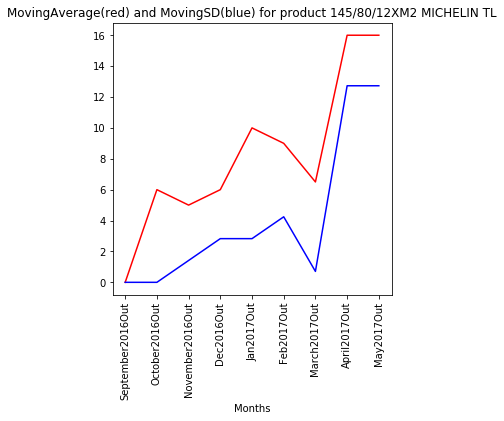

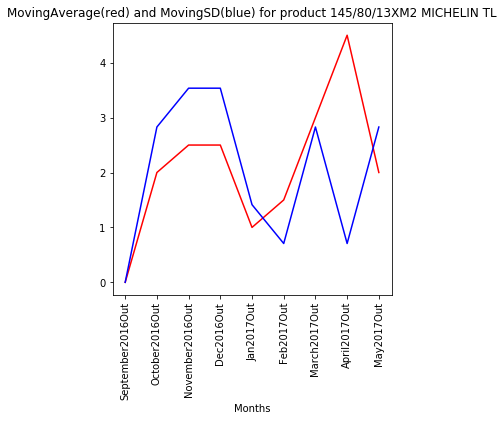

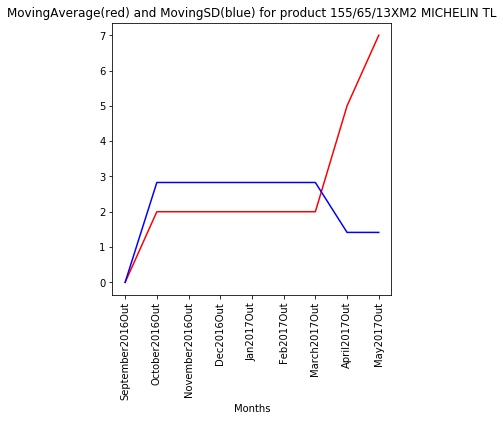

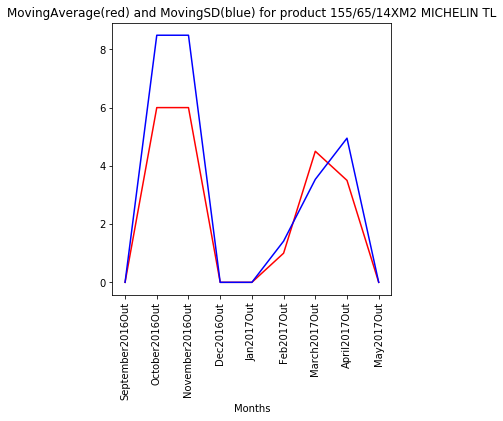

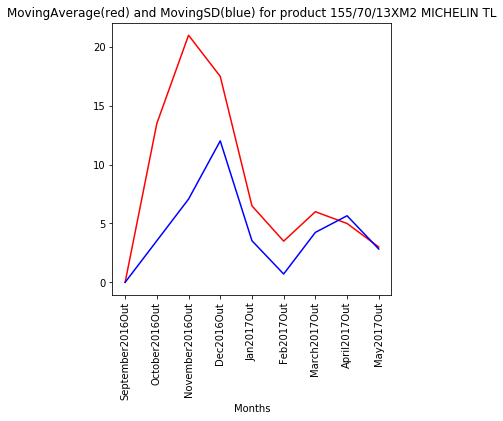

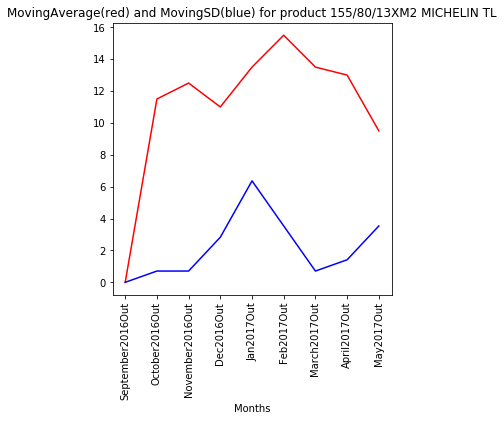

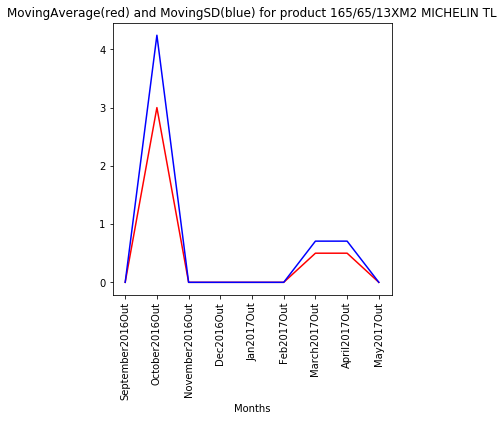

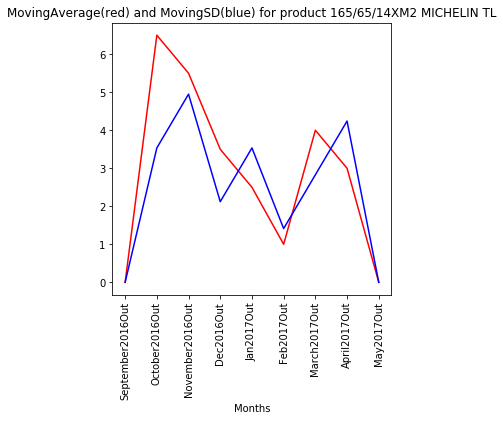

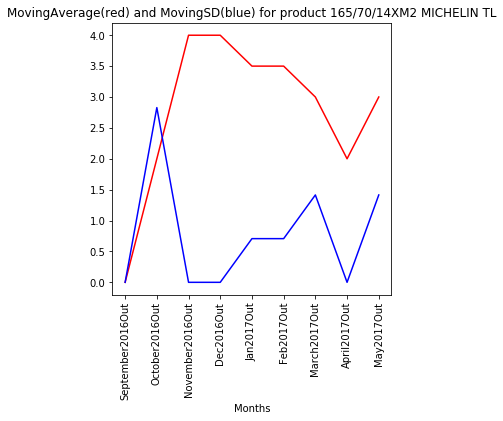

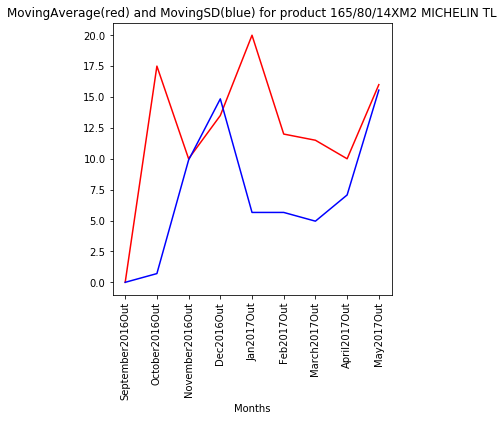

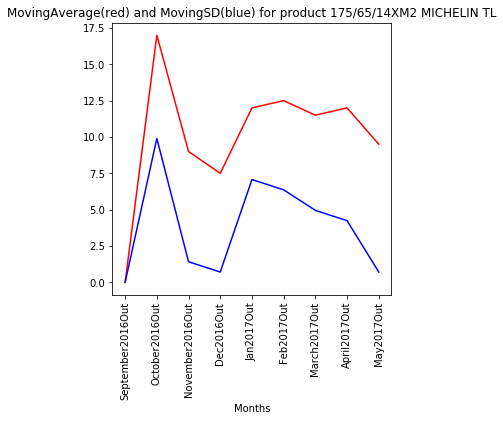

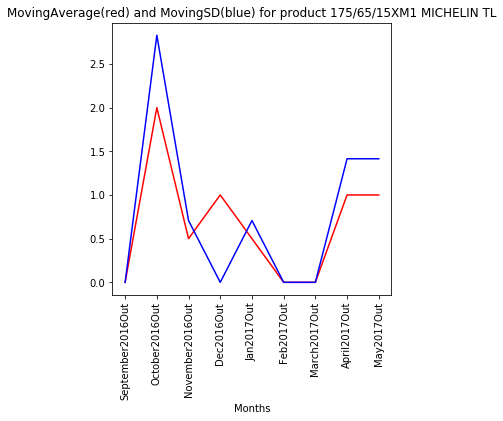

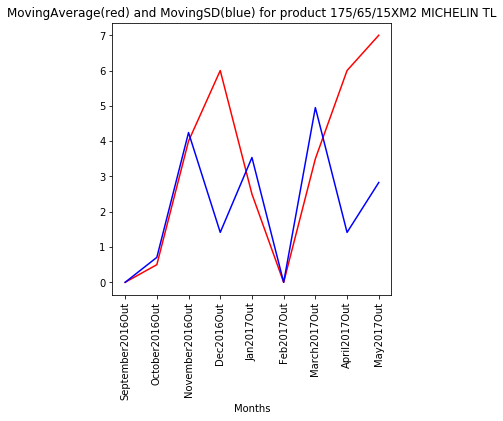

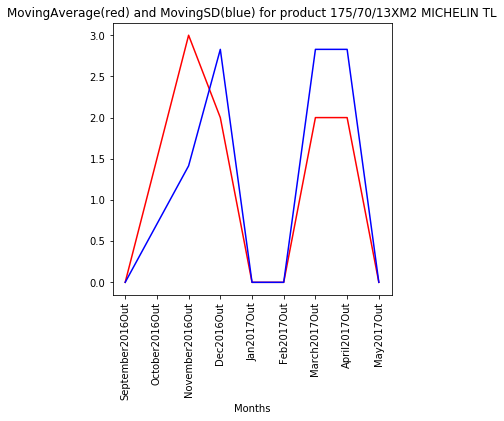

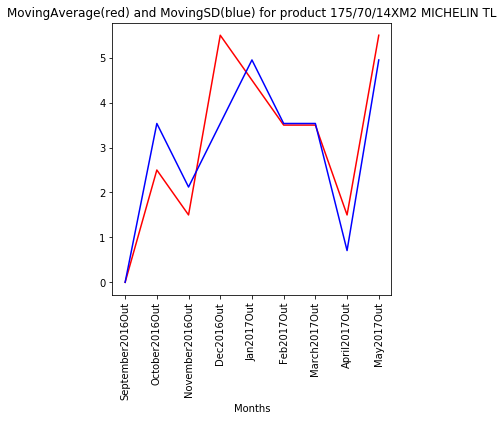

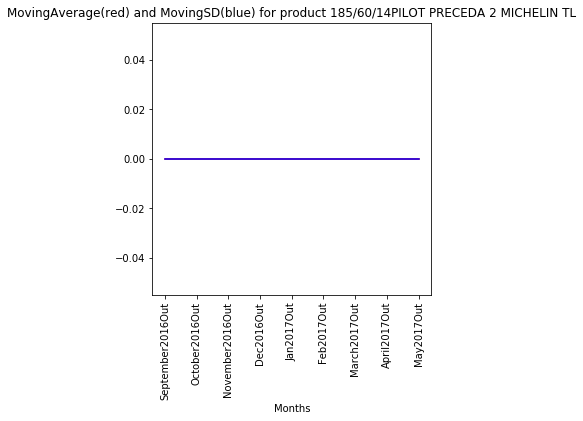

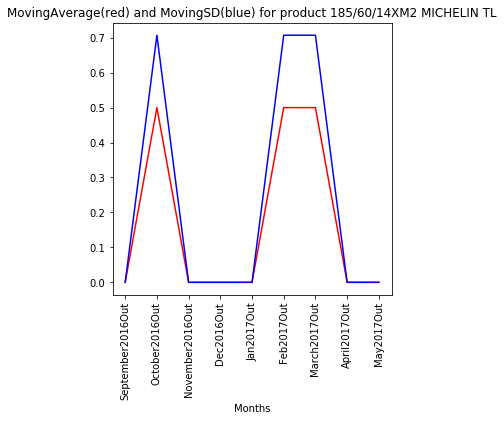

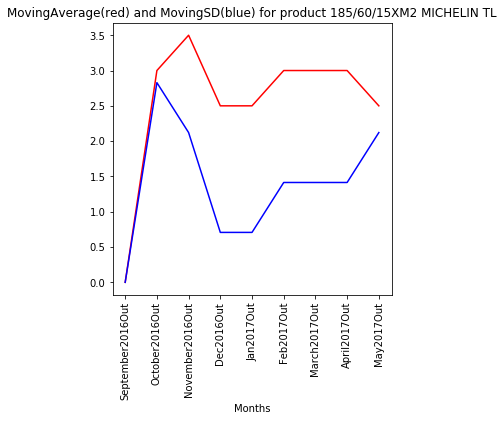

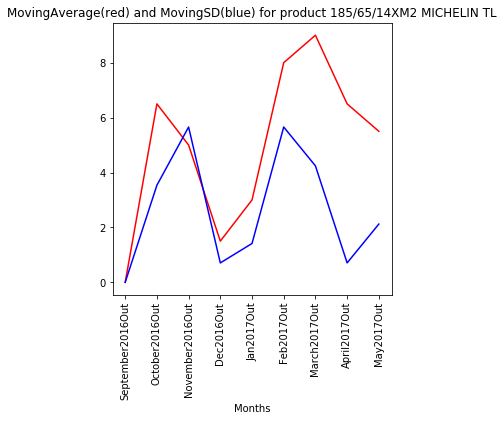

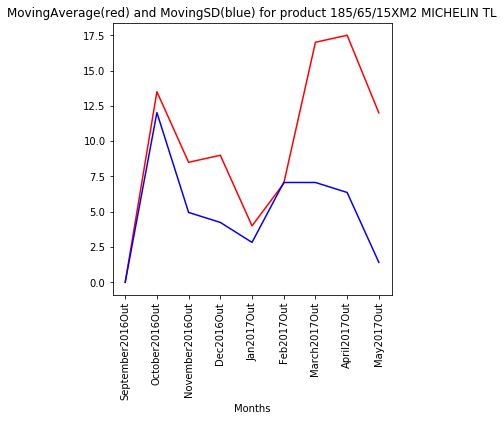

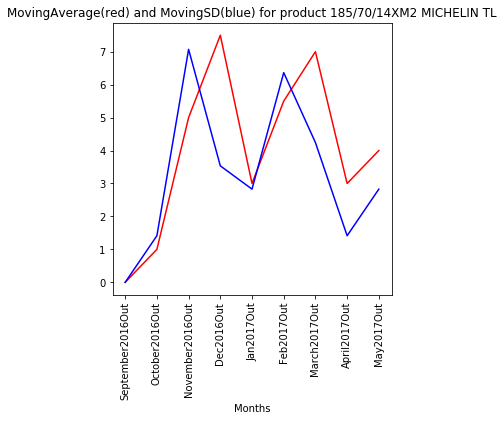

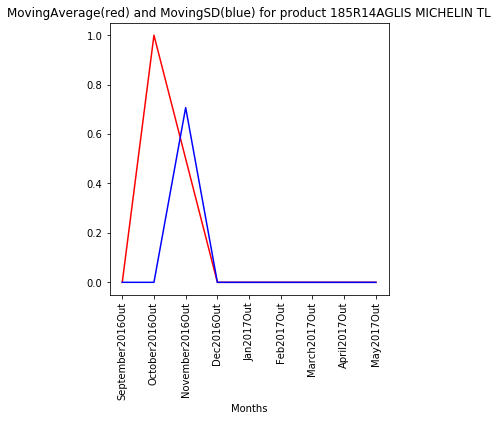

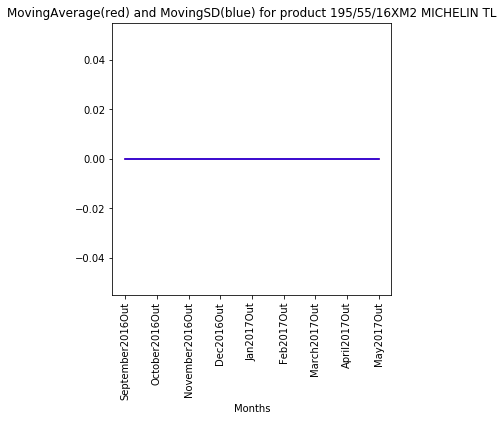

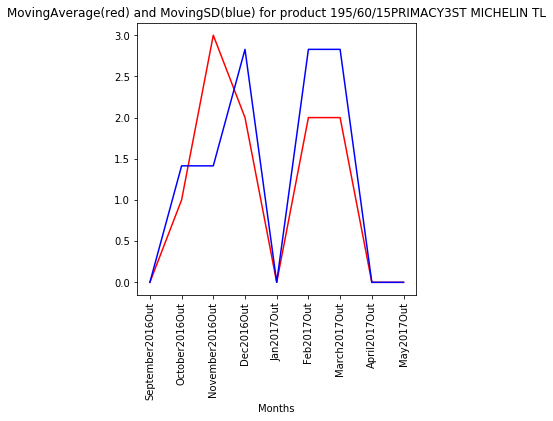

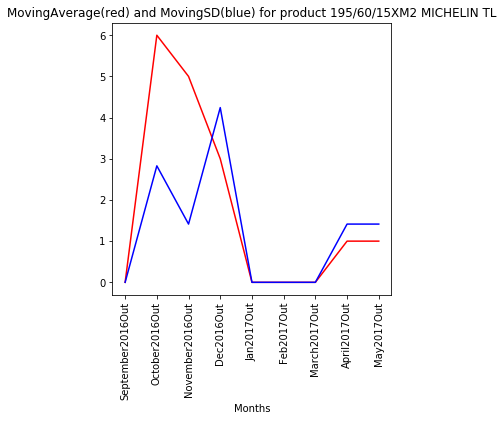

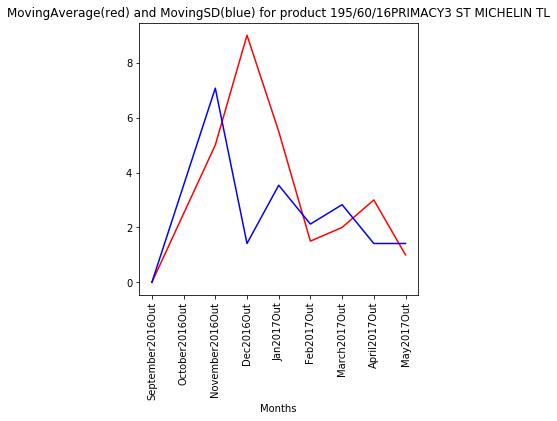

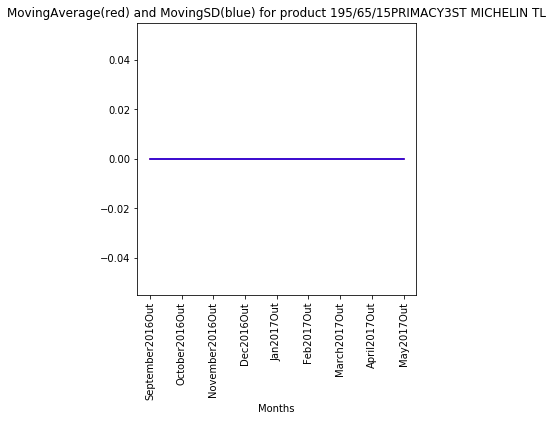

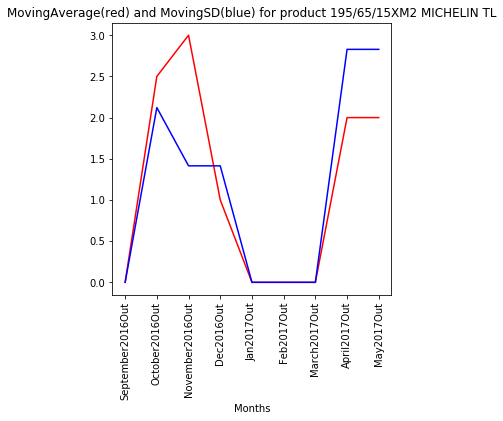

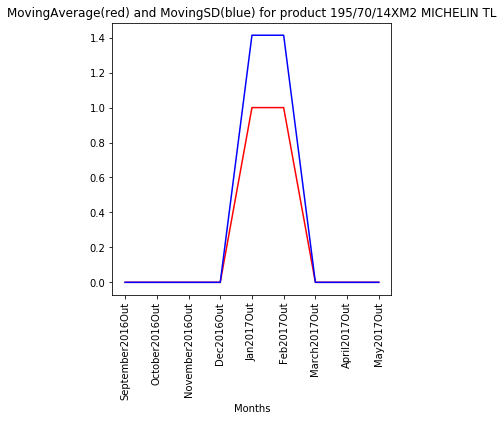

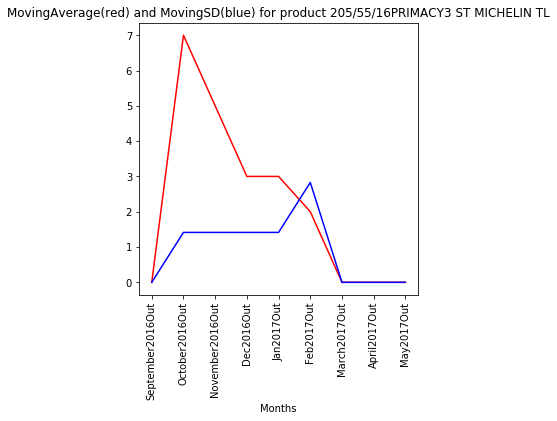

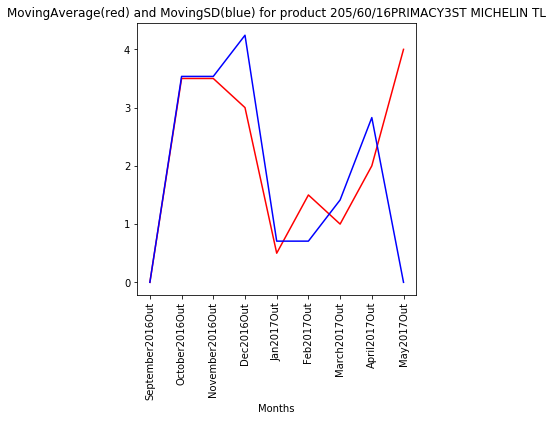

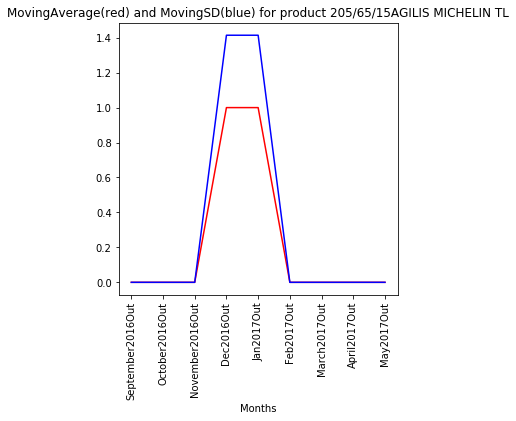

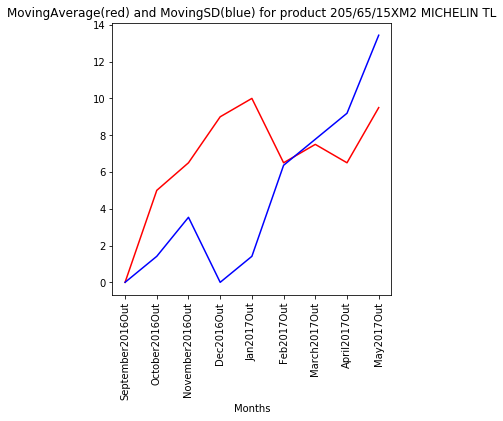

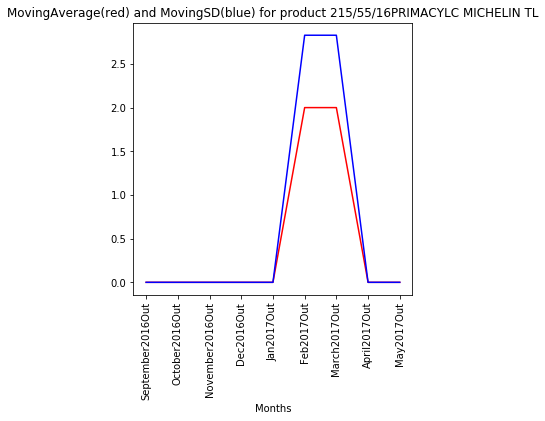

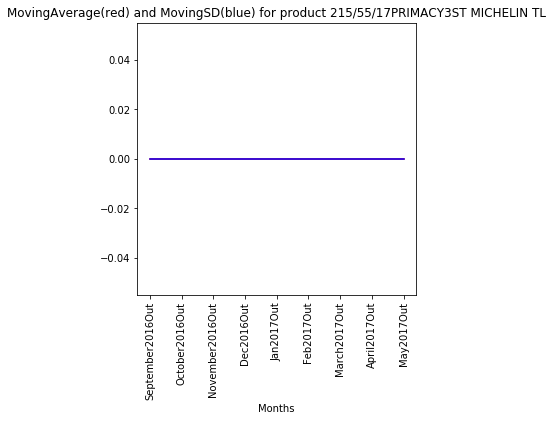

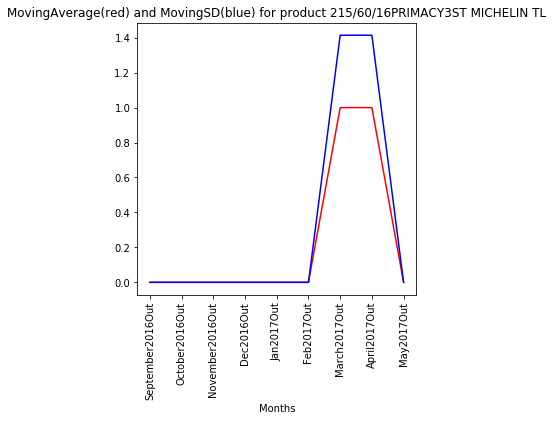

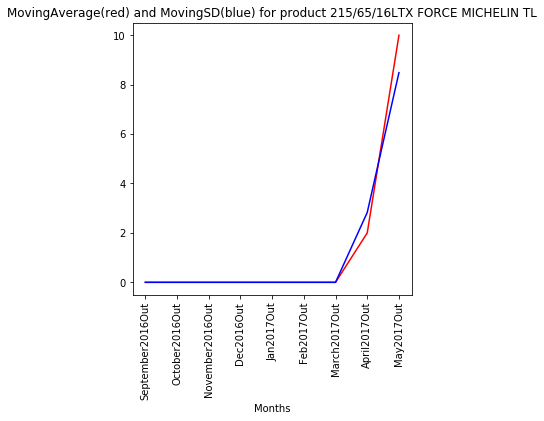

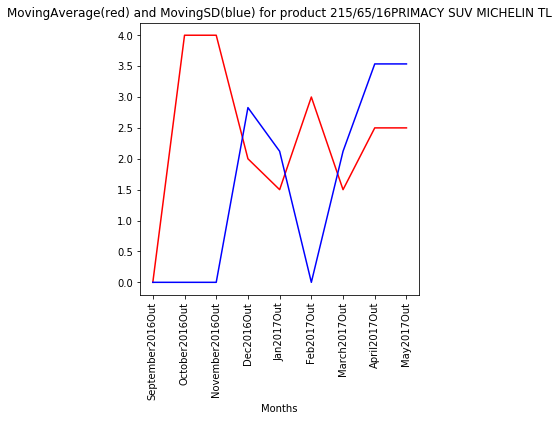

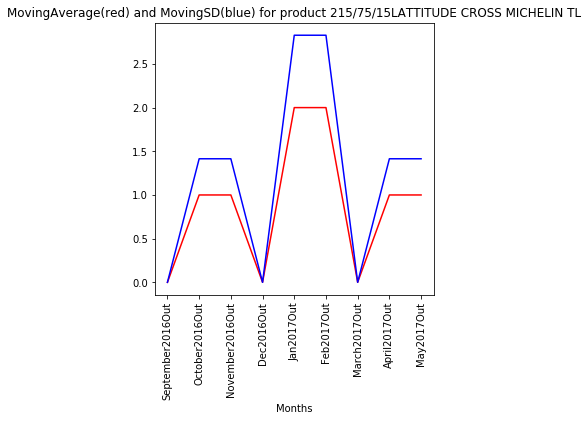

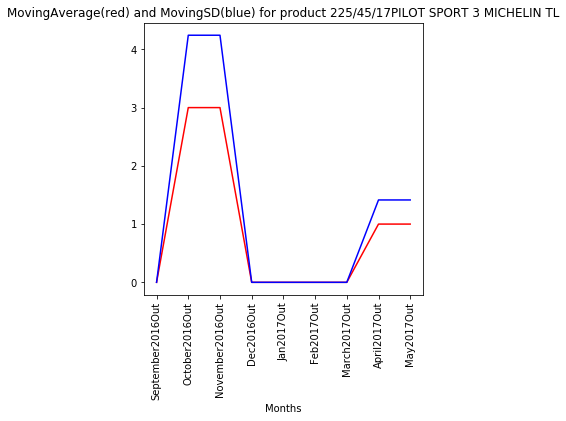

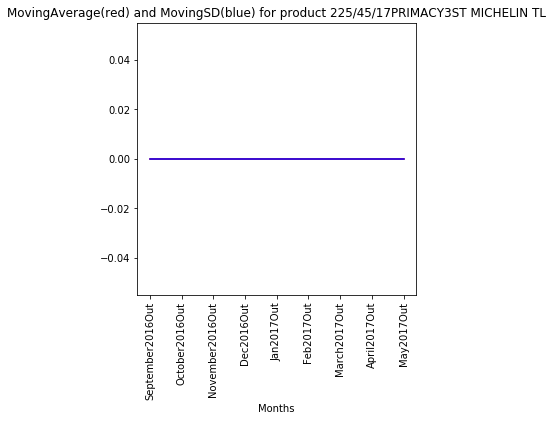

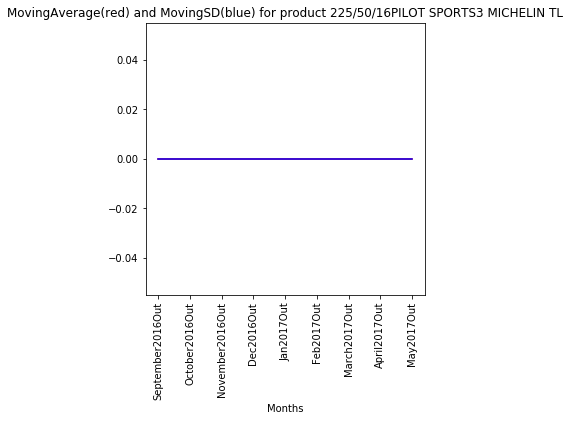

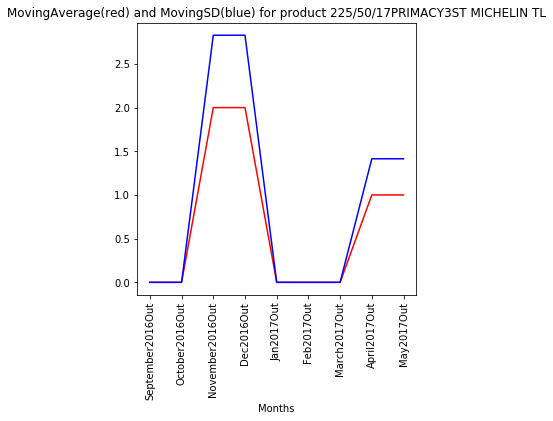

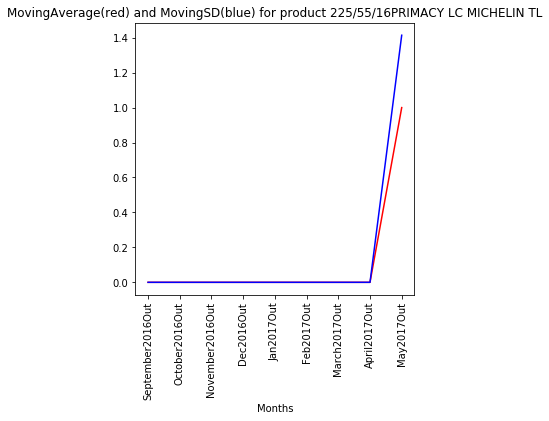

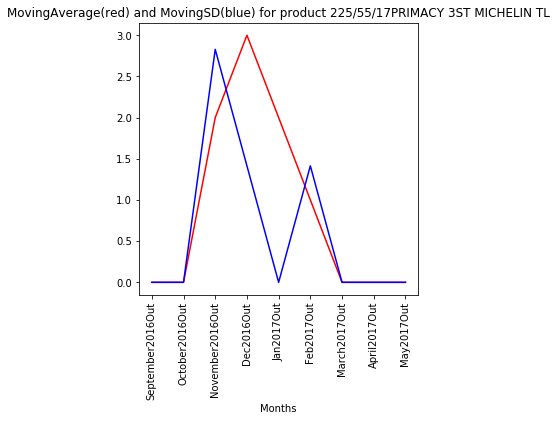

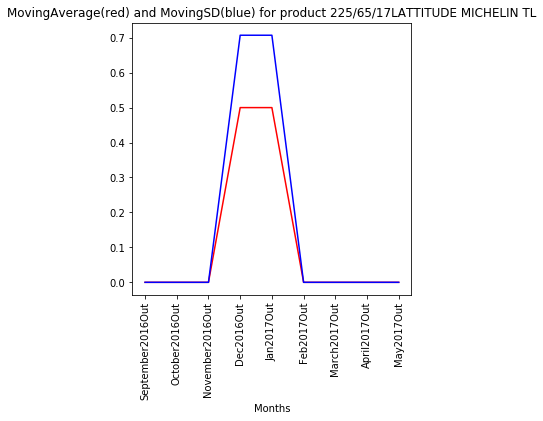

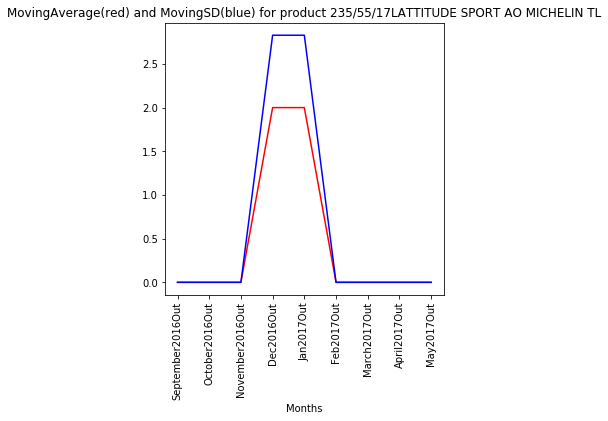

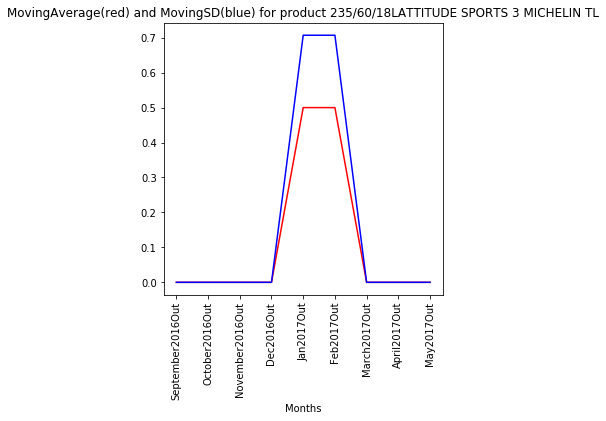

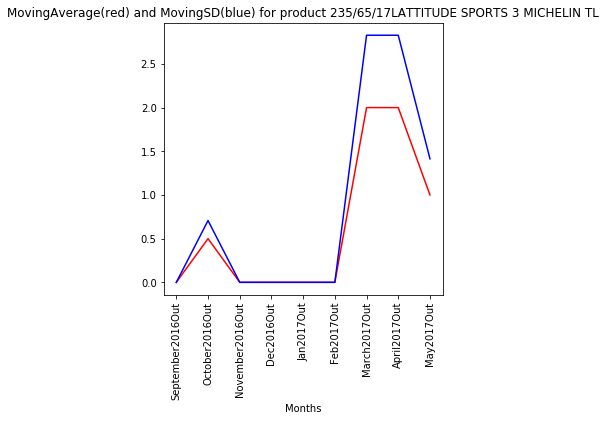

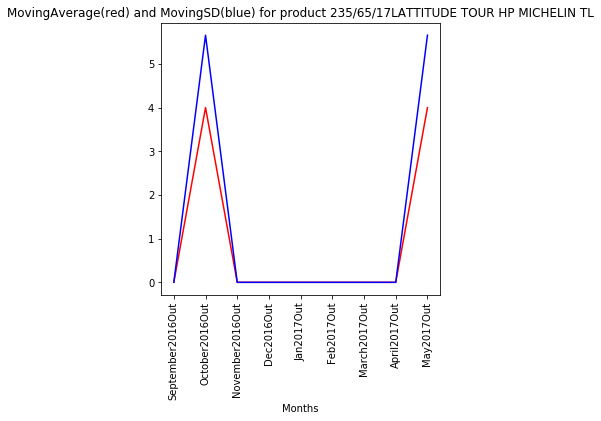

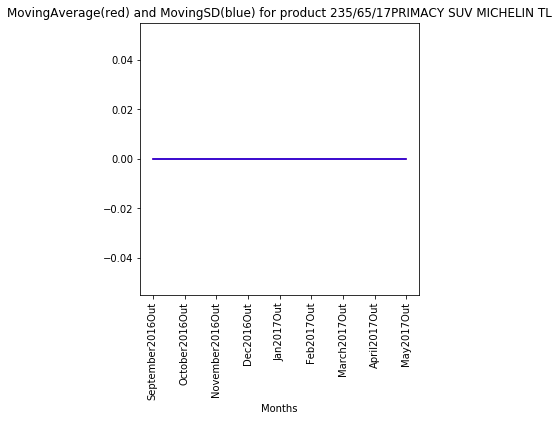

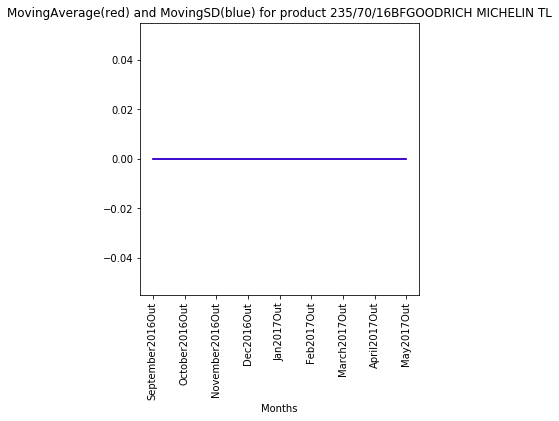

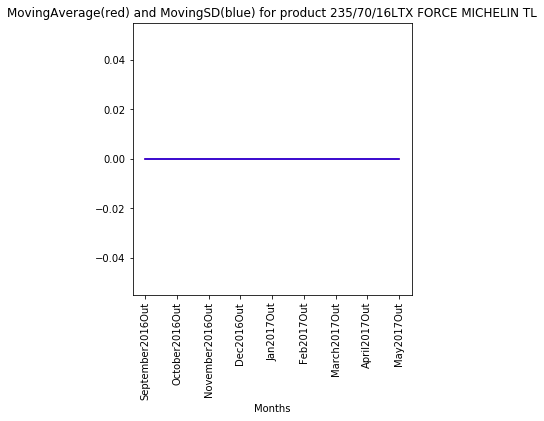

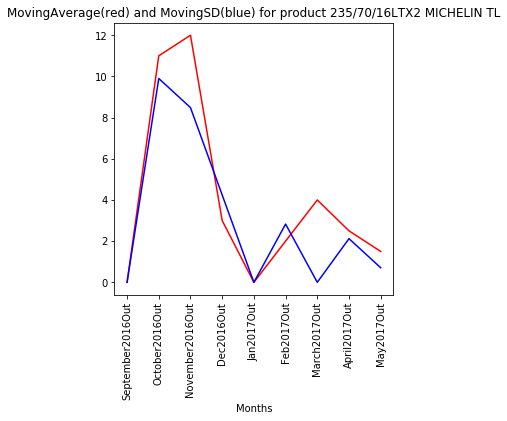

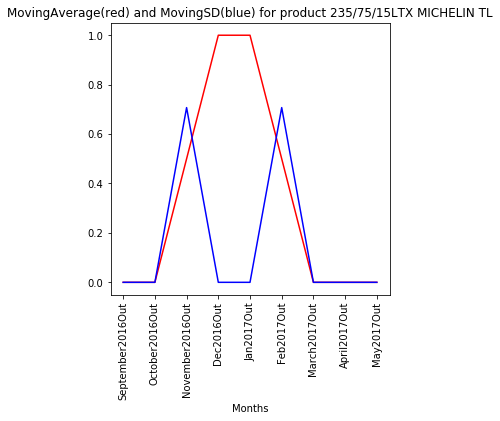

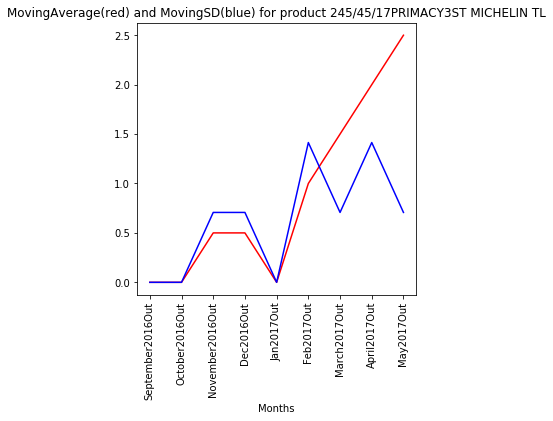

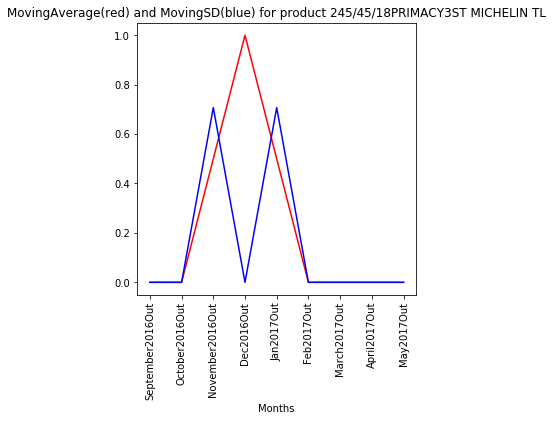

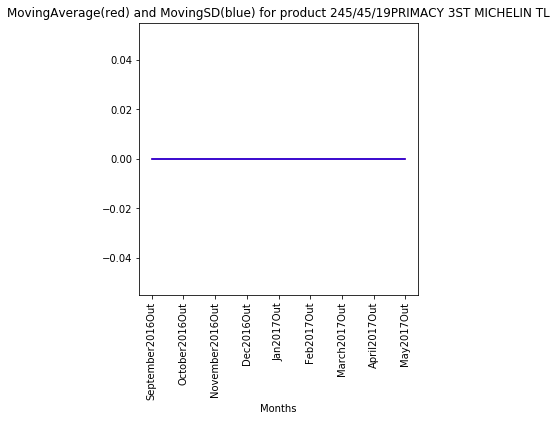

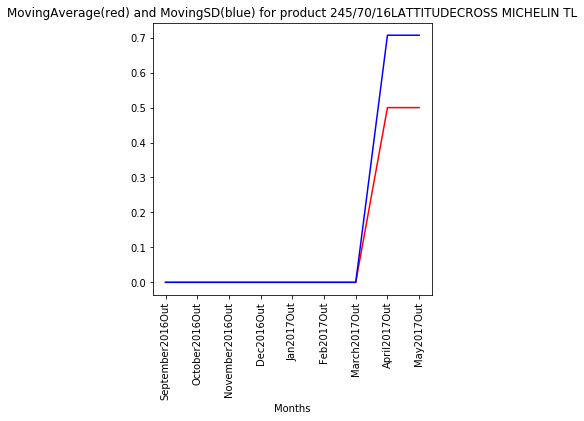

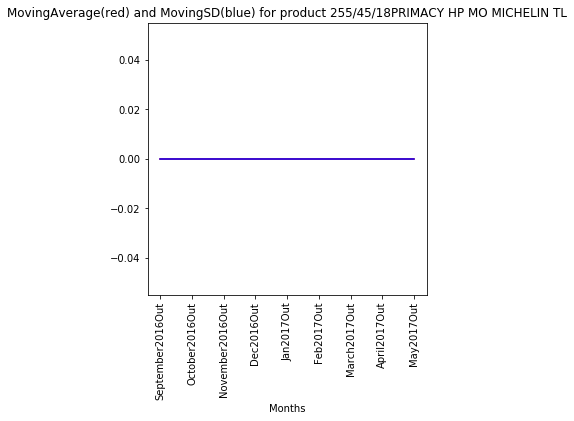

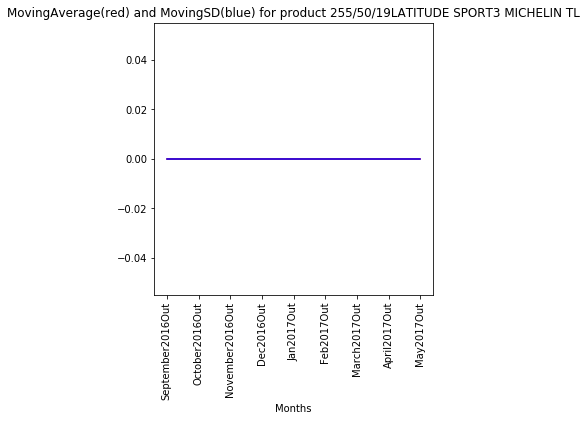

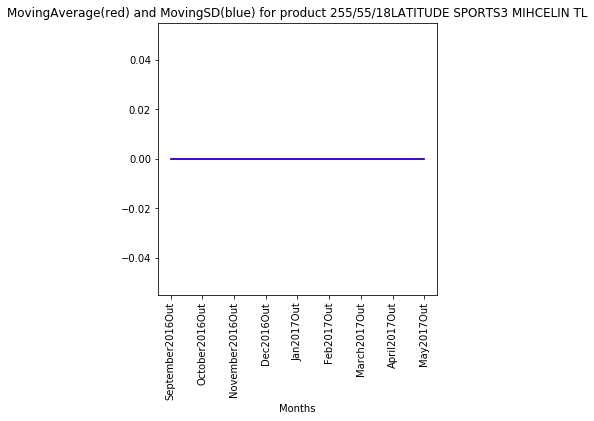

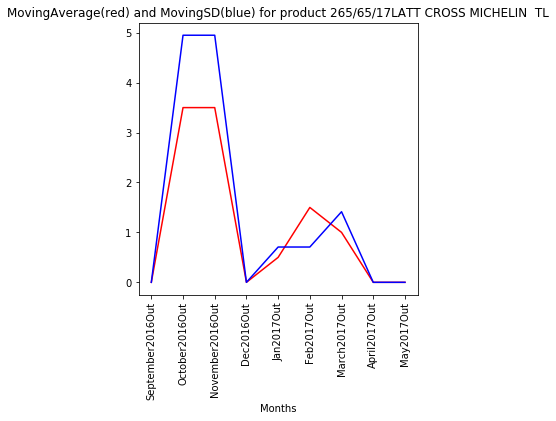

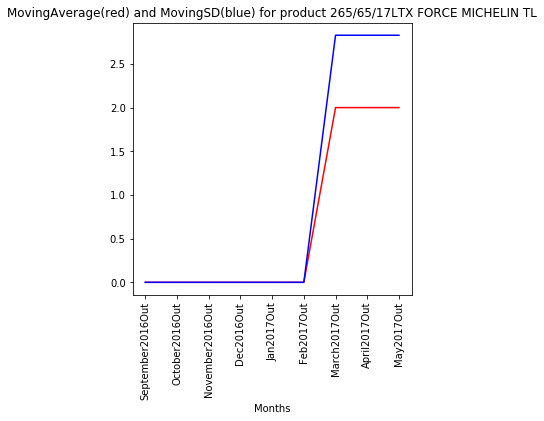

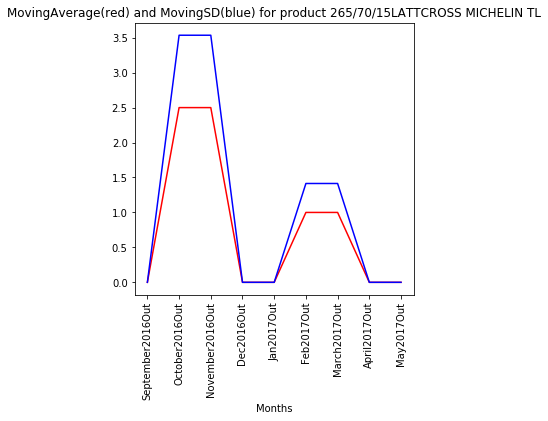

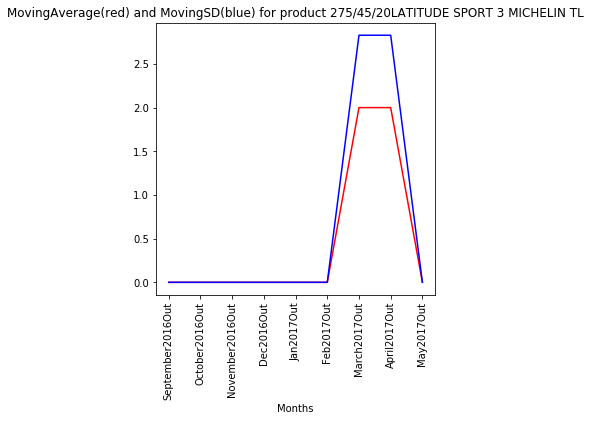

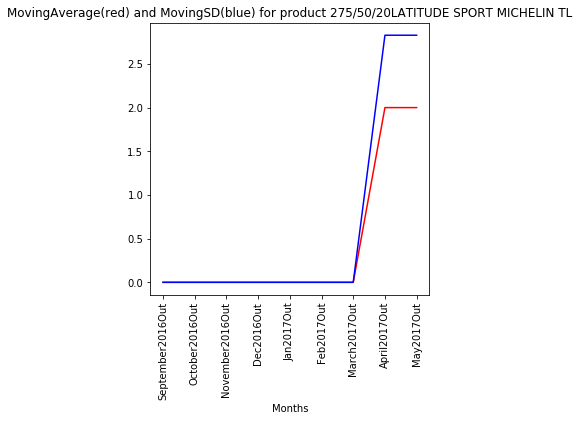

In [110]:
for col in demand_df.columns:
    fig, ax = plt.subplots(figsize=(5,5))
    ind = range(9)
    plt.plot(ind,mean_demand_df[col].values,color='red')
    plt.plot(ind,standard_demand_df[col].values,color='blue')
    ax.set_xticks(ind)
    ax.set_xticklabels(monthlydemand,rotation='vertical')
    ax.set_xlabel('Months')
    ax.set_title('MovingAverage(red) and MovingSD(blue) for product '+ col)
    plt.show()